# EDA and Statistical Analysis of FIFA Case Study

### Import libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize']=[15,6]

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

sc=StandardScaler()
mmax=MinMaxScaler()

In [3]:
from scipy import stats

## PART-A ( Concept Based)

### Q1. Compute the mean, median and the mode of the data.

In [4]:
bmi = pd.Series([17.5, 18.0, 36.8, 31.7, 31.7,17.3, 24.3, 47.7, 38.5, 17.0,23.7, 16.5, 25.1, 17.4, \
       18.0,37.6, 19.7, 21.4, 28.6, 21.6,19.3, 20.0, 16.9, 25.2, 19.8,25.0, 17.2, 20.4, 20.1,\
       29.1,19.1, 25.2, 23.2, 25.9, 24.0,41.7, 24.0, 16.8, 26.8, 31.4,16.9, 17.2, 24.1, 35.2, \
       19.1,22.9, 18.2, 25.4, 35.4, 25.5])
bmi.head()

0    17.5
1    18.0
2    36.8
3    31.7
4    31.7
dtype: float64

In [5]:
mean = np.mean(bmi)
median = np.median(bmi)
mode = bmi.mode()
print('Mean',mean)
print('Median',median)
print('Mode',mode[0])

Mean 24.422000000000008
Median 23.45
Mode 16.9


### Q2. Compute the range , variance and standard deviation of BMI.

In [6]:
q3=bmi.quantile(0.75)
q1=bmi.quantile(0.25)
IQR=q3-q1
var = np.var(bmi)
std = np.std(bmi)
Range = max(bmi)-min(bmi)
print('Range:',Range)
print("Interquartile Range:",IQR)
print('Variance:',var)
print('Standard Deviation:',std)

Range: 31.200000000000003
Interquartile Range: 8.150000000000006
Variance: 53.46971599999998
Standard Deviation: 7.312298954501244


### Q3. Find the mean deviation for the data . The mean deviation is defined as below.

In [7]:
n = len(bmi)
diff = bmi - mean
Mean_dev = sum(diff)/n
print('Mean deviation for the data',Mean_dev)

Mean deviation for the data -7.815970093361103e-15


### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data.

In [8]:
# A measure to determine the skewness of a distribution is called the Pearson coefficient of skewness.

skewness = (3*(mean - median))/std
print('Skewness',skewness)
print('The distribution is slightly positively skewed ,since the coefficient is positive.')

Skewness 0.3987801945932501
The distribution is slightly positively skewed ,since the coefficient is positive.


### Q5. Count the number of data values that fall within one standard deviation of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [9]:
print('Number of data values that fall within one standard deviation of the mean:',mean-std,'-',mean+std)

Number of data values that fall within one standard deviation of the mean: 17.109701045498763 - 31.734298954501252


In [10]:
# Chebyshev’s Theorem
a = 1/(std**2)
Cheb = (1-a)
Cheb

0.9812978247350331

### Q6. Find the three quartiles and the interquartile range (IQR).

In [11]:
q1=bmi.quantile(0.25)
q2=bmi.quantile(0.50)
q3=bmi.quantile(0.75)
IQR=q3-q1
print('Q1',q1)
print('Q2',q2)
print('Q3',q3)
print("IQR:",IQR)

Q1 18.424999999999997
Q2 23.45
Q3 26.575000000000003
IQR: 8.150000000000006


### Q7. Are there any outliers in the data set ?

In [12]:
lower_outlier = q1 - 1.5*IQR
higher_outlier = q3 + 1.5*IQR
print('lower_outlier',lower_outlier)
print('higher_outlier',higher_outlier)

lower_outlier 6.199999999999989
higher_outlier 38.80000000000001


### Q8. Draw a boxplot of the dataset to confirm.

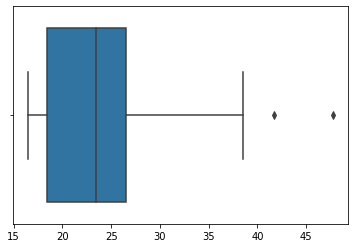

In [13]:
sns.boxplot(bmi)

### Q9. Find the percentile rank of the datapoint 25.0.

In [14]:
df=pd.DataFrame(bmi,columns=['BMI'])

In [15]:
per_rank = bmi.rank(pct = True)*100
df['per_rank']=per_rank
df.head()

,BMI,per_rank
0,17.5,20.0
1,18.0,23.0
2,36.8,92.0
3,31.7,85.0
4,31.7,85.0


In [16]:
df[df.BMI==25.0]['per_rank']

25    62.0
Name: per_rank, dtype: float64

### Q10. What is the probability that a young adult has a BMI above 25.0?

In [17]:
n=len(bmi[bmi>25.0])
prob = n/len(bmi)
print('prob',prob)

prob 0.38


### Q11. Create a frequency distribution for the data and visualize it appropriately.

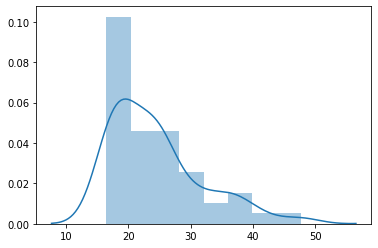

In [18]:
sns.distplot(bmi,kde=True)

# The plot is positively skewed i.e, right-skewed.

### Q12. Create a probability distribution of the data and visualize it appropriately.

In [19]:
bmi_df=pd.DataFrame(bmi,columns=['BMI'])

In [20]:
bmi_scaled=pd.DataFrame(sc.fit_transform(bmi_df),columns=['BMI'])
bmi_scaled.head(2)

,BMI
0,-0.946624
1,-0.878246


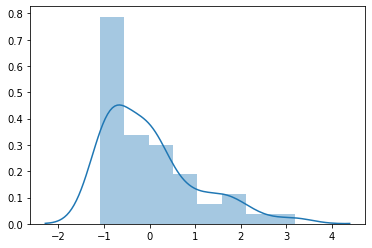

In [21]:
sns.distplot(bmi_scaled)

# The plot is positively skewed i.e, right-skewed.

### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

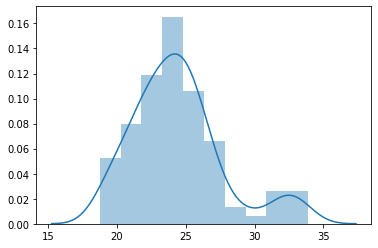

In [22]:
np.random.seed(1)
mean_ = []

for i in range(100):
    a = np.mean(np.random.choice(bmi,5))
    mean_.append(a)
    
sns.distplot(mean_)
plt.show()

In [23]:
a = pd.Series(mean_)
a.kurt()

# Leptokurtic curve

0.957699403226155

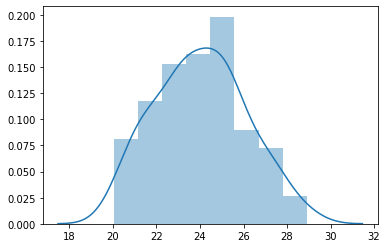

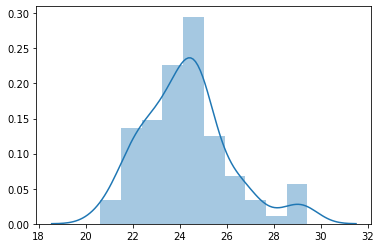

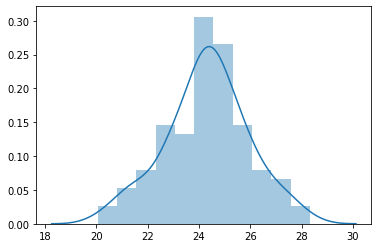

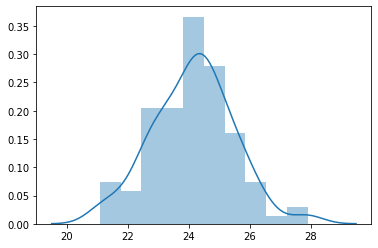

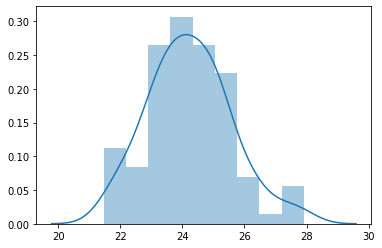

In [24]:
np.random.seed(2)
for j in (10, 15, 20, 25, 30):
    mean_1 = []
    for i in range(100):
        a = np.mean(np.random.choice(bmi,j))
        mean_1.append(a)
    sns.distplot(mean_1)
    plt.show()

In [25]:
b = pd.Series(mean_1)
b.kurt()

# This is also a Leptokurtic curve but not as peaked as when size is 5

0.15396698923079377

### Q14. Treat this dataset as a binomial distribution where p is the probability that a young adult has a BMI above 25.0. What is the probability that out of a random sample of 10 young adults exactly 6 are having BMI greater than 25.0?

In [26]:
p1 = len(bmi[bmi>25.0])
p = p1/len(bmi)
n = 10
x = 6
prob=stats.binom.pmf(x,n,p)
print('Probability that exactly 6 are having BMI greater than 25.0 is',prob)

Probability that exactly 6 are having BMI greater than 25.0 is 0.09343027613767904


### Q15. A study claims that 40% of all young adults have BMI greater than 25.0. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 100 young adults exactly 50 of them will have will have a BMI is greater than 25.0.

### [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [27]:
p = 0.38
n = 100
x = 50
prob=stats.binom.pmf(x,n,p)
print('Probability that exactly 50 of them will have will have a BMI is greater than 25.0 is',prob)

Probability that exactly 50 of them will have will have a BMI is greater than 25.0 is 0.0040984365460934435


### Q16. Compute a 95% Confidence Interval for the true BMI of the population of young adults using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [28]:
n = len(bmi)

# Since n > 30, we use Large sample z-test

mean = np.mean(bmi)
std = np.std(bmi)
alpha = 0.05
point_estimate = mean
zalphaby2 = stats.norm.isf(alpha/2)
mE = zalphaby2*(std/np.sqrt(n))
CI_L = point_estimate - mE
CI_U = point_estimate + mE
print('95% confidence interval for the true BMI of the population',CI_L, '-', CI_U)

95% confidence interval for the true BMI of the population 22.395171382833723 - 26.448828617166292


### Q17. A data scientist wants to estimate with 95% confidence the proportion of young adults having BMI greater than 25.0. A recent study showed that 40% of all young adults have BMI greater than 25.0. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [29]:
p = 0.40
alpha = 0.05
q = 0.60

z_alpha_2 = stats.norm.isf(alpha/2)
E = 0.02

n = ((z_alpha_2/E)**2)*p*q
n

2304.875292416477

### Q18. The same data scientist wants to estimate the true proportion of young adults having BMI greater than 25.0. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [30]:
alpha = 0.10
E = 0.05
p = 0.40
q = 0.60

z_alpha_2 = stats.norm.isf(alpha/2)

n = ((z_alpha_2/E)**2)*p*q
n

259.73217159315976

### Q19. A researcher claims that currently 55% of all young adults have BMI greater than 25 . Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only 20 are having BMI above 25.

In [31]:
alpha = 0.05

### Step 1 : State the Hypothesis
# Ho : p_young_adults <= 0.55
# H1 : p_young_adults > 0.55

### Step 2 : Decision criteria
# Right tail test
z_alpha = stats.norm.isf(0.05)
print('z_alpha:', z_alpha)

### Step 3 : Calculate Sample Statistic
p = 20/30
P = 0.55
Q = 0.45

num = p-P
denom = np.sqrt(P*Q/n)
z = num / denom
print('z:',z)

### Step 4 : Critical value approach
# Z_alpha < z

### Step 5: Checking pvalue
pvalue = stats.norm.sf(z)
print('pvalue:', pvalue)
# pvalue < alpha , falls into rejection region
# We reject Ho

# Step 6 : Communication of decision
print('Hence out of a random sample of 30 CEOs people having BMI above 25 is not only 20')

z_alpha: 1.6448536269514729
z: 3.7793930605054356
pvalue: 7.860554639804623e-05
Hence out of a random sample of 30 CEOs people having BMI above 25 is not only 20


### Q 20. A data scientist is researching the hypothesis that there is no difference between BMI of public vs private schools students. So he collects data from the two schools and finds that the proportion of public school students whose BMI is above 25.0 is 31.8 % vs Private school students is 38.7 %. Suppose the data scientist got these values after interviewing 500 students of each school.

### a. What hypothesis would he use to compare the proportions of students having BMI greater than 25.0 among both the schools.

In [32]:
p_public = 0.318
p_private = 0.387
n1 = 500
n2 = 500

# We use Two-sample Z-test for Proportions since we have two samples with their respective proportions given.

In [33]:
### Step 1 : State the Hypotheses
# Ho : p_private - p_public = 0 
# Ha : p_private - p_public <> 0 

### Step 2 : Decision Criteria
# Two Tail Test 
alpha = 0.05
zalpha = stats.norm.isf(alpha/2)
print('zalpha',zalpha)

### Step 3 : Calculate Sample Statistic 
p_public = 0.318
p_private = 0.387
# mu_1 - mu_2 = 0
n1 = 500
n2 = 500
num = (p_private - p_public) 
denom = np.sqrt(((p_public*(1-p_public))/n1)+((p_private*(1-p_private))/n1))
z = num/denom
print('z',z)

### Step 4 : Critical value method
# Since zalpha < z , the sample fall in rejection zone
# We reject Ho

### Step 5 : pvalue
p_val=stats.norm.sf(z)*2
print('pvalue',p_val)
print('alpha',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
print('Hence there is a difference between BMI of public vs private schools students.')

zalpha 1.9599639845400545
z 2.289575634094921
pvalue 0.02204592880864176
alpha 0.05
Hence there is a difference between BMI of public vs private schools students.


### b. What are critical values to be used?

In [34]:
alpha = 0.05
zalpha = stats.norm.isf(alpha/2)
print('Critical values:',+zalpha,'and',-zalpha)

Critical values: 1.9599639845400545 and -1.9599639845400545


### c. What statistical test will be used to compare these proportions ?

In [35]:
p_public = 0.318
p_private = 0.387
# mu_1 - mu_2 = 0
n1 = 500
n2 = 500
num = (p_private - p_public) 
denom = np.sqrt(((p_public*(1-p_public))/n1)+((p_private*(1-p_private))/n2))
z = num/denom
print('z',z)

z 2.289575634094921


### d. Complete the test and obtain the P-value.

In [36]:
p_val=stats.norm.sf(z)*2
print('pvalue',p_val)
print('alpha',alpha)

pvalue 0.02204592880864176
alpha 0.05


### e. Summarize his conclusion based on the P-value.

## PART-B ( Dataset Based)

## EDA and STATS Mini Project-FIFA Case Study :

### Data:

In [37]:
fifa_var = pd.read_csv('fifa_ variable_information.csv')
fifa_var.head(2)

,ID,unique id for every player
0,Name,name
1,Age,age


In [38]:
fifa_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          59 non-null     object
 1   unique id for every player  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


## Data Preprocessing:

### 1. Import the necessary libraries and read the data.

In [39]:
fifa = pd.read_csv('fifa.csv')
fifa.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


### 2. Drop any columns that you deem unnecessary for analysis.

#### Hint: At least keep the following columns
['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot',
'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International
Reputation’, ‘Position’]
#### We encourage you to perform an analysis including other variables apart from the above variables.

In [40]:
fifa.isnull().sum()[fifa.isnull().sum()!=0]

Club                          331
Preferred Foot                 65
International Reputation       65
Weak Foot                      65
Skill Moves                    65
Work Rate                      65
Body Type                      65
Position                       89
Jersey Number                  89
Joined                       2171
Loaned From                 23715
Contract Valid Until          396
Height                         65
Weight                         65
Crossing                       65
Finishing                      65
HeadingAccuracy                65
ShortPassing                   65
Volleys                        65
Dribbling                      65
Curve                          65
FKAccuracy                     65
LongPassing                    65
BallControl                    65
Acceleration                   65
SprintSpeed                    65
Agility                        65
Reactions                      65
Balance                        65
ShotPower     

In [41]:
# We can remove Loaned From column because 90% datas are missing

fifa = fifa.drop(['Loaned From'], axis=1)

### 3. The following columns need to be converted for further analysis:

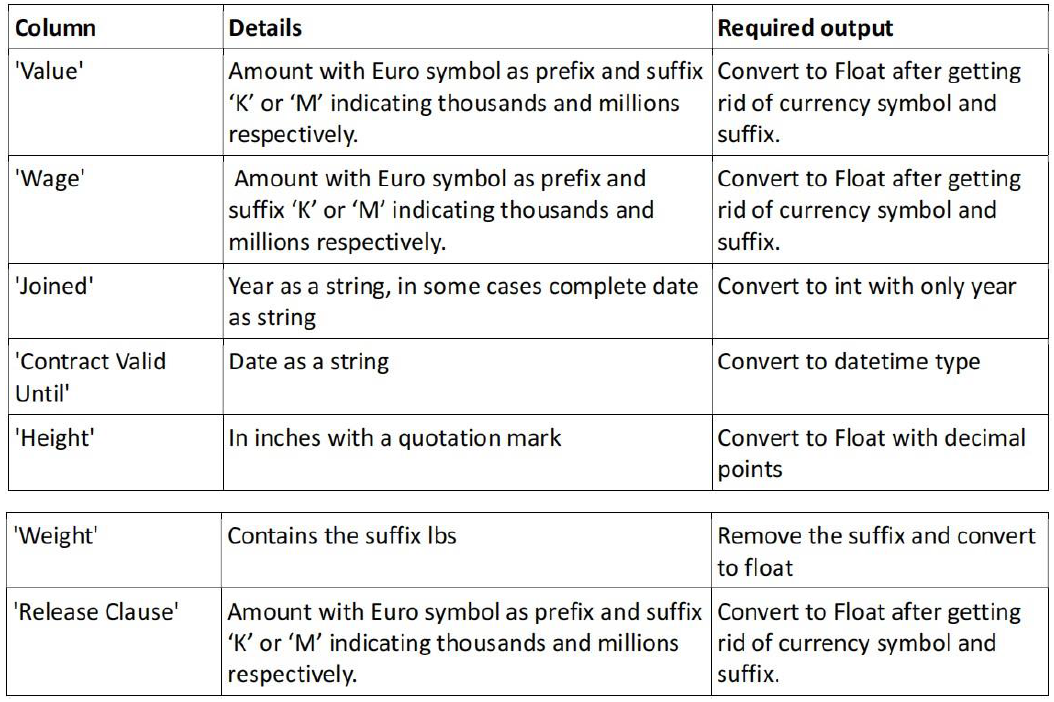

#### (You might encounter Nan values in the above columns. Pandas treat Nan values as a float. Please keep that in mind when making the conversions.)

In [42]:
fifa['Joined'].unique()

array(['Jun 8, 2017', 'Aug 23, 2018', 'Aug 23, 2017', ..., 'Aug 9, 2012',
       'Jul 13, 2014', 'May 4, 2010'], dtype=object)

In [43]:
fifa['Height'] = fifa['Height'].apply(lambda x: str(x).replace("'","."))
fifa['Height'] = fifa['Height'].astype('float')

In [44]:
fifa['Weight'] = fifa['Weight'].apply(lambda x: str(x).replace('lbs',''))
fifa['Weight'] = fifa['Weight'].astype('float')

In [45]:
fifa['Wage'].unique()

array(['€1K', '€16K', '€46K', '€6K', '€8K', '€39K', '€2K', '€19K', '€4K',
       '€28K', '€26K', '€10K', '€17K', '€11K', '€47K', '€3K', '€34K',
       '€115K', '€13K', '€23K', '€9K', '€44K', '€5K', '€0', '€40K',
       '€50K', '€32K', '€30K', '€25K', '€7K', '€24K', '€29K', '€15K',
       '€27K', '€20K', '€22K', '€35K', '€14K', '€140K', '€130K', '€12K',
       '€21K', '€41K', '€31K', '€105K', '€120K', '€48K', '€51K', '€53K',
       '€37K', '€73K', '€315K', '€165K', '€96K', '€70K', '€18K', '€71K',
       '€66K', '€52K', '€60K', '€42K', '€75K', '€38K', '€36K', '€87K',
       '€160K', '€43K', '€88K', '€77K', '€84K', '€64K', '€340K', '€54K',
       '€55K', '€33K', '€79K', '€72K', '€68K', '€62K', '€45K', '€61K',
       '€175K', '€59K', '€125K', '€85K', '€65K', '€405K', '€95K', '€76K',
       '€150K', '€74K', '€155K', '€57K', '€58K', '€49K', '€300K', '€56K',
       '€80K', '€99K', '€230K', '€135K', '€285K', '€83K', '€205K', '€78K',
       '€86K', '€100K', '€91K', '€240K', '€92K', '€97K', '€45

In [46]:
fifa['Wage'] = fifa['Wage'].apply(lambda x : str(x).replace('€',''))
fifa['Wage'] = fifa['Wage'].apply(lambda x : str(x).replace('K','000'))
fifa['Wage'] = fifa['Wage'].astype('float')
fifa['Wage']

0         1000.0
1        16000.0
2        46000.0
3         6000.0
4         1000.0
          ...   
25485    19000.0
25486     6000.0
25487    43000.0
25488     6000.0
25489     3000.0
Name: Wage, Length: 25490, dtype: float64

In [47]:
fifa['Value'] = fifa['Value'].apply(lambda x : str(x).replace('€',''))
fifa['Value'] = fifa['Value'].apply(lambda x : str(x).replace('K','000'))
fifa['Value'] = fifa['Value'].apply(lambda x : str(x).replace('.',''))
fifa['Value'] = fifa['Value'].apply(lambda x : str(x).replace('M','00000'))
fifa['Value'] = fifa['Value'].astype('float')
fifa['Value']

0         220000.0
1         925000.0
2         500000.0
3        3800000.0
4         120000.0
           ...    
25485    5500000.0
25486    2300000.0
25487    6500000.0
25488     100000.0
25489     825000.0
Name: Value, Length: 25490, dtype: float64

In [48]:
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x : str(x).replace('€',''))
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x : str(x).replace('K','000'))
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x : str(x).replace('.',''))
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x : str(x).replace('M','00000'))
fifa['Release Clause'] = fifa['Release Clause'].astype('float')
fifa['Release Clause'] 

0          429000.0
1         1800000.0
2         9600000.0
3         6100000.0
4          198000.0
            ...    
25485     8300000.0
25486     3900000.0
25487    11100000.0
25488     1900000.0
25489     1300000.0
Name: Release Clause, Length: 25490, dtype: float64

In [49]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])

In [50]:
fifa['Joined'] = pd.to_datetime(fifa['Joined'])
fifa['Joined'] = fifa['Joined'].dt.year
fifa['Joined'] = fifa['Joined'].fillna(fifa['Joined'].mode()[0])
fifa['Joined'] = fifa['Joined'].astype('int')

### 4. Check the duplicate records and do appropriate treatments.

In [51]:
fifa[fifa.duplicated()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
152,211732,T. Thiele,26,https://cdn.sofifa.org/players/4/19/211732.png,Germany,https://cdn.sofifa.org/flags/21.png,67,68,1. FC Kaiserslautern,https://cdn.sofifa.org/teams/2/light/29.png,...,68.0,18.0,16.0,17.0,15.0,8.0,15.0,13.0,11.0,1400000.0
290,227708,Lucas Tagliapietra,27,https://cdn.sofifa.org/players/4/19/227708.png,Brazil,https://cdn.sofifa.org/flags/54.png,69,71,Al Batin,https://cdn.sofifa.org/teams/2/light/112990.png,...,65.0,58.0,71.0,66.0,10.0,11.0,9.0,12.0,6.0,1800000.0
321,240584,B. Verbong,18,https://cdn.sofifa.org/players/4/19/240584.png,Netherlands,https://cdn.sofifa.org/flags/34.png,58,70,VVV-Venlo,https://cdn.sofifa.org/teams/2/light/100651.png,...,42.0,13.0,14.0,12.0,61.0,59.0,60.0,52.0,58.0,264000.0
373,231823,J. Hoogma,20,https://cdn.sofifa.org/players/4/19/231823.png,Netherlands,https://cdn.sofifa.org/flags/34.png,69,80,TSG 1899 Hoffenheim,https://cdn.sofifa.org/teams/2/light/10029.png,...,63.0,67.0,72.0,69.0,11.0,13.0,14.0,7.0,9.0,300000.0
378,238160,M. Demiral,20,https://cdn.sofifa.org/players/4/19/238160.png,Turkey,https://cdn.sofifa.org/flags/48.png,73,83,Alanyaspor,https://cdn.sofifa.org/teams/2/light/113142.png,...,61.0,74.0,77.0,73.0,15.0,7.0,13.0,6.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25484,201401,Campabadal,25,https://cdn.sofifa.org/players/4/19/201401.png,Spain,https://cdn.sofifa.org/flags/45.png,68,73,CD Lugo,https://cdn.sofifa.org/teams/2/light/110831.png,...,58.0,65.0,70.0,73.0,15.0,7.0,12.0,10.0,14.0,1600000.0
25485,207559,S. Tibbling,23,https://cdn.sofifa.org/players/4/19/207559.png,Sweden,https://cdn.sofifa.org/flags/46.png,73,79,Brøndby IF,https://cdn.sofifa.org/teams/2/light/269.png,...,73.0,62.0,63.0,51.0,13.0,15.0,12.0,9.0,14.0,8300000.0
25486,205157,Ruiz de Galarreta,24,https://cdn.sofifa.org/players/4/19/205157.png,Spain,https://cdn.sofifa.org/flags/45.png,70,75,UD Las Palmas,https://cdn.sofifa.org/teams/2/light/472.png,...,62.0,66.0,69.0,65.0,12.0,6.0,13.0,7.0,12.0,3900000.0
25487,188802,M. Schmelzer,30,https://cdn.sofifa.org/players/4/19/188802.png,Germany,https://cdn.sofifa.org/flags/21.png,77,77,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/22.png,...,72.0,75.0,78.0,80.0,14.0,10.0,15.0,9.0,8.0,11100000.0


### 5. Check the variation of the features. If you are performing variance and standard deviation. Kindly explain why the variances of the variables are higher than the standard deviation. Also, explain which one tells the exact variation of the features. Based on this analysis decide which feature is not needed.

In [52]:
fifa.var()

ID                          8.927027e+08
Age                         2.161638e+01
Overall                     4.684004e+01
Potential                   3.736261e+01
Value                       1.411846e+13
Wage                        4.672180e+08
International Reputation    1.482556e-01
Weak Foot                   4.371287e-01
Skill Moves                 5.753799e-01
Jersey Number               2.556410e+02
Joined                      4.214945e+00
Height                      2.016367e-01
Weight                      2.445986e+02
Crossing                    3.369448e+02
Finishing                   3.782183e+02
HeadingAccuracy             2.987649e+02
ShortPassing                2.131365e+02
Volleys                     3.127341e+02
Dribbling                   3.581205e+02
Curve                       3.392299e+02
FKAccuracy                  3.083983e+02
LongPassing                 2.330150e+02
BallControl                 2.785355e+02
Acceleration                2.197655e+02
SprintSpeed     

* Variances of the variables are higher than the standard deviation because the variances are the square of the standard deviation. 
* Since the variances are square of standard deviation it won't tell the exact variation of the features
* So we use standard deviation to know the exact variation.

### 6. Check for missing values and do imputations where necessary.Note: Do the appropriate imputation based on the distribution.

#### Hints: Few analyses are listed below to decide which imputation method to perform.
1. Skewness level verification
2. Kurtosis level measurement identification
Explain what the Skewness and Kurtosis depicted.
3. Distribution plots like KDE, Distribution plot, Box plot, etc.

In [53]:
fifa.skew()[fifa.skew()>0]

Age                         0.389618
Overall                     0.067458
Potential                   0.232121
Value                       9.123536
Wage                        7.838347
International Reputation    4.112358
Weak Foot                   0.144511
Skill Moves                 0.149097
Jersey Number               2.189765
Weight                      0.238150
FKAccuracy                  0.093266
GKDiving                    2.449797
GKHandling                  2.441910
GKKicking                   2.437073
GKPositioning               2.472544
GKReflexes                  2.461090
Release Clause              7.496098
dtype: float64

In [54]:
fifa.kurt()[(fifa.kurt()>3.0)]

ID                            9.380289
Value                       140.796856
Wage                         96.423568
International Reputation     19.556367
Jersey Number                 7.063643
Joined                       12.296388
GKDiving                      4.480421
GKHandling                    4.479309
GKKicking                     4.488748
GKPositioning                 4.673731
GKReflexes                    4.550406
Release Clause               85.463933
dtype: float64

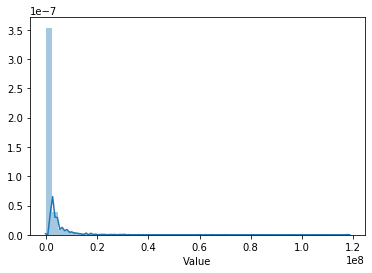

In [55]:
sns.distplot(fifa['Value'])

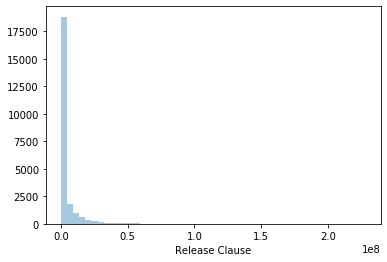

In [56]:
sns.distplot(fifa['Release Clause'],kde=False)

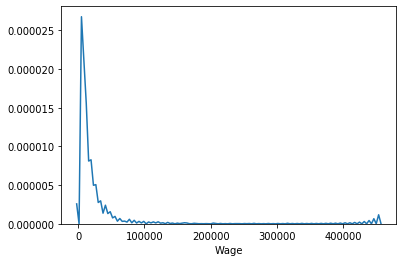

In [57]:
sns.distplot(fifa['Wage'],hist=False)

In [58]:
cat = fifa.select_dtypes(include='object').columns
cat

Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo',
       'Preferred Foot', 'Work Rate', 'Body Type', 'Position'],
      dtype='object')

In [59]:
fifa['Preferred Foot'] = fifa['Preferred Foot'].fillna(fifa['Preferred Foot'].mode()[0])

In [60]:
fifa['Photo'] = fifa['Photo'].fillna(fifa['Photo'].mode()[0])
fifa['Nationality'] = fifa['Nationality'].fillna(fifa['Nationality'].mode()[0])
fifa['Flag'] = fifa['Flag'].fillna(fifa['Flag'].mode()[0])
fifa['Club'] = fifa['Club'].fillna(fifa['Club'].mode()[0])
fifa['Club Logo'] = fifa['Club Logo'].fillna(fifa['Club Logo'].mode()[0])
fifa['Work Rate'] = fifa['Work Rate'].fillna(fifa['Work Rate'].mode()[0])
fifa['Body Type'] = fifa['Body Type'].fillna(fifa['Body Type'].mode()[0])
fifa['Position'] = fifa['Position'].fillna(fifa['Position'].mode()[0])

In [61]:
num = fifa.select_dtypes(include=np.number).isnull().sum()
num

ID                             0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
International Reputation      65
Weak Foot                     65
Skill Moves                   65
Jersey Number                 89
Joined                         0
Height                        65
Weight                        65
Crossing                      65
Finishing                     65
HeadingAccuracy               65
ShortPassing                  65
Volleys                       65
Dribbling                     65
Curve                         65
FKAccuracy                    65
LongPassing                   65
BallControl                   65
Acceleration                  65
SprintSpeed                   65
Agility                       65
Reactions                     65
Balance                       65
ShotPower                     65
Jumping                       65
Stamina   

In [62]:
fifa[['Jersey Number','Height']] = fifa[['Jersey Number','Height']].fillna(fifa[['Jersey Number','Height']].median())
fifa[['Weight','Crossing']] = fifa[['Weight','Crossing']].fillna(fifa[['Weight','Crossing']].median())
fifa[['International Reputation']] =fifa[['International Reputation']].fillna(fifa[['International Reputation']].median())
fifa[['Finishing']] = fifa[['Finishing']].fillna(fifa[['Finishing']].median())
fifa[['Weak Foot', 'Skill Moves']] = fifa[['Weak Foot', 'Skill Moves']].fillna(fifa[['Weak Foot', 'Skill Moves']].median())
fifa[['HeadingAccuracy']] = fifa[['HeadingAccuracy']].fillna(fifa[['HeadingAccuracy']].median())
fifa[['ShortPassing']] = fifa[['ShortPassing']].fillna(fifa[['ShortPassing']].median())
fifa[['Volleys','Dribbling']] = fifa[['Volleys','Dribbling']].fillna(fifa[['Volleys','Dribbling']].median())
fifa[['Curve','FKAccuracy']] = fifa[['Curve','FKAccuracy']].fillna(fifa[['Curve','FKAccuracy']].median())
fifa[['LongPassing','BallControl']] = fifa[['LongPassing','BallControl']].fillna(fifa[['LongPassing','BallControl']].median())
fifa[['Acceleration','SprintSpeed']] = fifa[['Acceleration','SprintSpeed']].fillna(fifa[['Acceleration','SprintSpeed']].median())
fifa[['Agility','Reactions']] = fifa[['Agility','Reactions']].fillna(fifa[['Agility','Reactions']].median())
fifa[['Balance','ShotPower']] = fifa[['Balance','ShotPower']].fillna(fifa[['Balance','ShotPower']].median())
fifa[['Jumping','Stamina']] = fifa[['Jumping','Stamina']].fillna(fifa[['Jumping','Stamina']].median())
fifa[['Strength','LongShots']] = fifa[['Strength','LongShots']].fillna(fifa[['Strength','LongShots']].median())
fifa[['Aggression','Interceptions']] = fifa[['Aggression','Interceptions']].fillna(fifa[['Aggression','Interceptions']].median())
fifa[['Positioning','Vision']] = fifa[['Positioning','Vision']].fillna(fifa[['Positioning','Vision']].median())
fifa[['Penalties','Composure']] = fifa[['Penalties','Composure']].fillna(fifa[['Penalties','Composure']].median())
fifa[['Marking','StandingTackle']] = fifa[['Marking','StandingTackle']].fillna(fifa[['Marking','StandingTackle']].median())
fifa[['SlidingTackle','GKDiving']] = fifa[['SlidingTackle','GKDiving']].fillna(fifa[['SlidingTackle','GKDiving']].median())
fifa[['GKHandling','GKKicking']] = fifa[['GKHandling','GKKicking']].fillna(fifa[['GKHandling','GKKicking']].median())
fifa[['GKPositioning','GKReflexes']] =fifa[['GKPositioning','GKReflexes']].fillna(fifa[['GKPositioning','GKReflexes']].median())
fifa[['Release Clause']] = fifa[['Release Clause']].fillna(fifa[['Release Clause']].median())

In [63]:
fifa['GKDiving']

0         7.0
1         9.0
2        76.0
3        13.0
4        59.0
         ... 
25485    13.0
25486    12.0
25487    14.0
25488     9.0
25489     8.0
Name: GKDiving, Length: 25490, dtype: float64

In [64]:
fifa.isnull().sum()

ID                            0
Name                          0
Age                           0
Photo                         0
Nationality                   0
Flag                          0
Overall                       0
Potential                     0
Club                          0
Club Logo                     0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                     0
Position                      0
Jersey Number                 0
Joined                        0
Contract Valid Until        396
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccura

In [65]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode()[0])

In [66]:
df = fifa.drop(['Contract Valid Until'],axis=1)

### 7. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What would happen if the data has above or below the mentioned values and display the names of the players?

In [67]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [68]:
ll = 2*iqr - q1
ul = 2*iqr + q3
trim_fifa = df[~((df<ll)|(df>ul))]
trim_fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21.0,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58.0,69.0,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,NaN,NaN,NaN,7.0,9.0,9.0,6.0,15.0,NaN
1,183465,J. Rodwell,27.0,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68.0,68.0,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,NaN
2,205186,P. Gazzaniga,26.0,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74.0,78.0,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,233531,Y. Soteldo,21.0,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71.0,81.0,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,...,65.0,NaN,NaN,NaN,13.0,7.0,9.0,13.0,6.0,6100000.0
4,243718,R. Koot,18.0,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56.0,68.0,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 8. Check the Categorical variables and Find if there is any data imbalance in any column also find if any cardinality problem exists.

In [69]:
cat = fifa.select_dtypes(include='object').columns
cat

Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo',
       'Preferred Foot', 'Work Rate', 'Body Type', 'Position'],
      dtype='object')

In [70]:
plt.rcParams['figure.figsize']=[15,6]

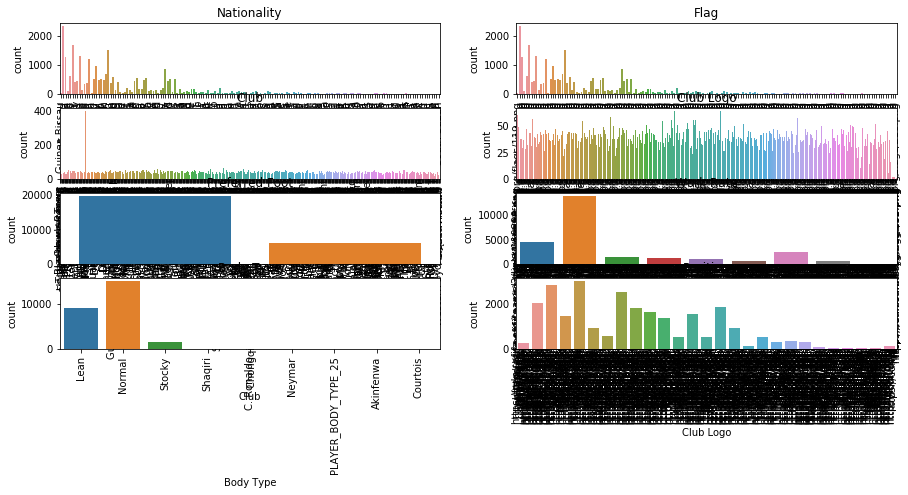

In [71]:
cols = ['Nationality', 'Flag', 'Club', 'Club Logo',
       'Preferred Foot', 'Work Rate', 'Body Type', 'Position']

rows =4
columns =2
iterator =1

for i in cols:
    plt.subplot(rows, columns, iterator)
    sns.countplot(fifa.loc[:, i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### 9. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

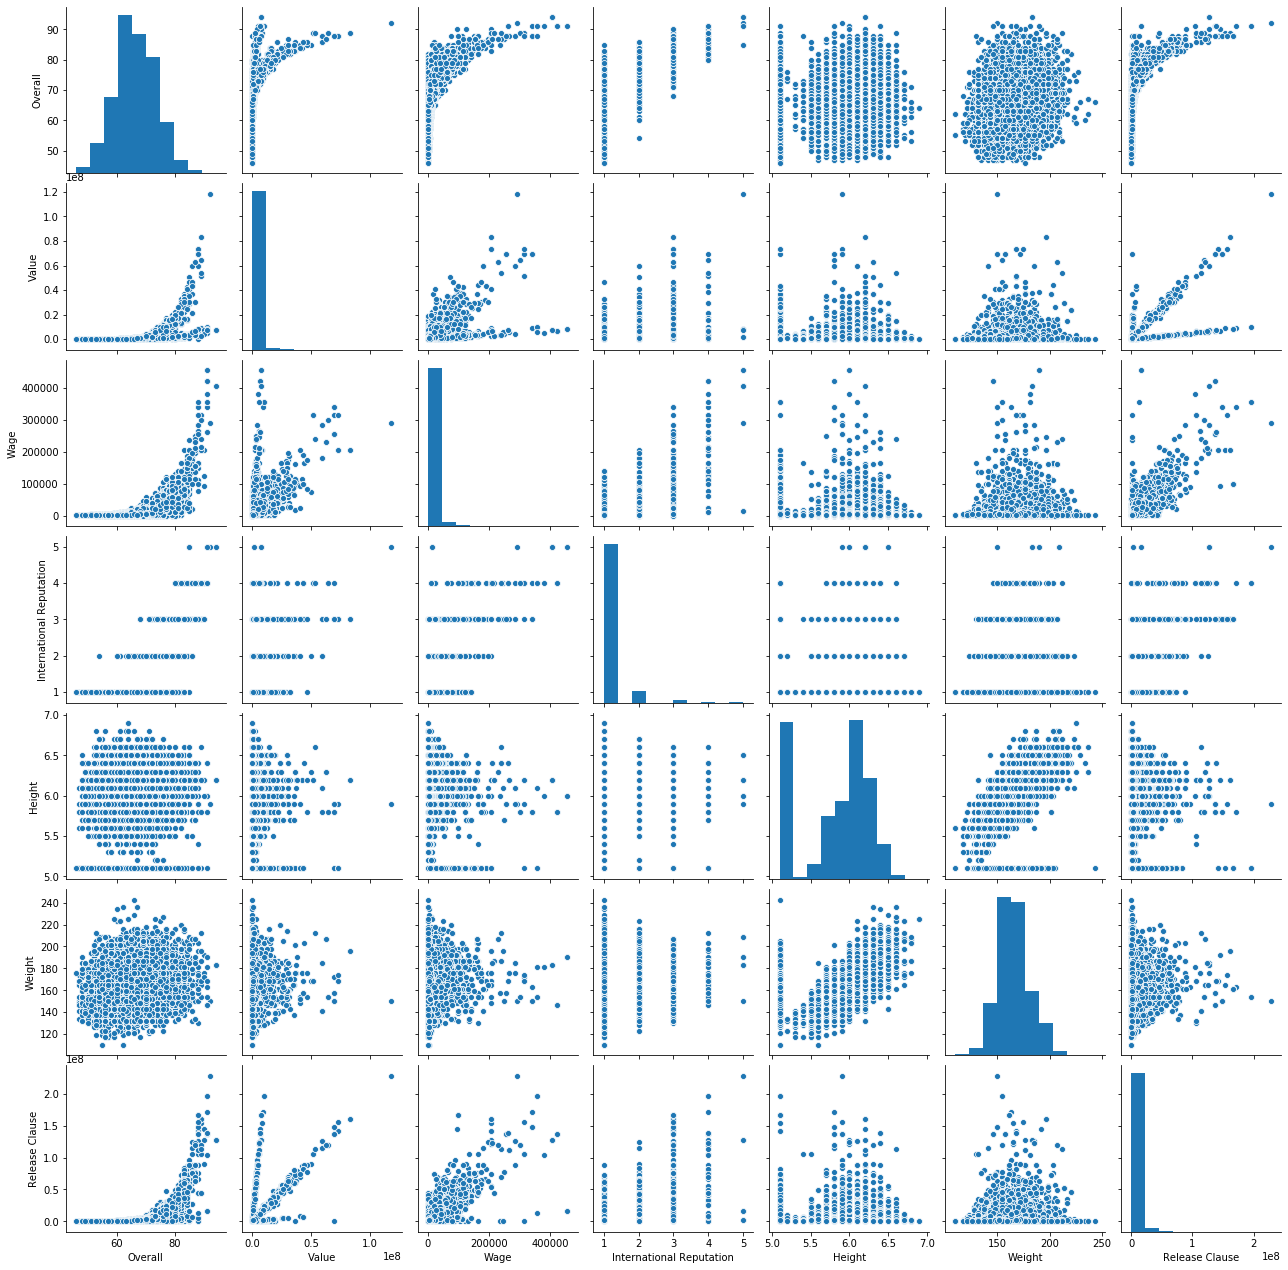

In [72]:
sns.pairplot(fifa[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])

### 10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020

#### a. What would the average wage for this set of players be?

In [73]:
fifa['Contract Valid Until'].unique()

array(['2019-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000',
       '2019-06-30T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-05-31T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2020-05-31T00:00:00.000000000',
       '2019-01-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2020-02-27T00:00:00.000000000',
       '2019-01-12T00:00:00.000000000', '2026-01-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2018-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-01-30T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2025-01-01

In [74]:
a = fifa['Overall'].groupby(fifa['Contract Valid Until']=='2020-06-30T00:00:00.000000000').value_counts(ascending=False).head(20)

In [75]:
a.mean()

1088.7

#### b. What is the average age?

In [76]:
b = fifa['Age'].groupby(fifa['Contract Valid Until']=='2020-06-30T00:00:00.000000000').head(20)

In [77]:
b.mean()

23.514285714285716

#### c. Is there a correlation between the Overall rating and Value for these players? If Yes what kind of relationship that the features have, also explain why this kind of relationship could happen.

In [78]:
fifa['Overall'].corr(fifa['Value'])

0.5081942830806037

### 11. Generate tables containing the top 5 players by Overall rating for each unique position.

#### a. Are there any players appearing at more than one table? Please point out such players.

In [79]:
fifa.describe(include='object')

,Name,Photo,Nationality,Flag,Club,Club Logo,Preferred Foot,Work Rate,Body Type,Position
count,25490,25490,25490,25490,25490,25490,25490,25490,25490,25490
unique,13053,13657,160,160,651,678,2,9,9,27
top,R. Williams,https://cdn.sofifa.org/players/4/19/237679.png,England,https://cdn.sofifa.org/flags/14.png,Empoli,https://cdn.sofifa.org/teams/2/light/144.png,Right,Medium/ Medium,Normal,ST
freq,13,8,2332,2332,395,64,19519,13752,14935,2971


In [80]:
fifa.Name.value_counts()[fifa.Name.value_counts()>7]

R. Williams      13
J. Rodríguez     13
J. Murphy        11
L. Rodríguez     10
L. Martínez      10
J. Jones         10
J. Wright        10
L. Suárez        10
J. Williams      10
Felipe           10
Y. Tanaka         9
Marcão            9
J. Martin         9
S. Jovanović      9
D. Jones          9
J. Hernández      9
R. Griffiths      8
R. Kolo-Muani     8
S. Brown          8
Carlitos          8
A. González       8
Danilo            8
D. Johnson        8
D. Schmidt        8
A. Traoré         8
A. Ba             8
J. Pérez          8
Name: Name, dtype: int64

#### b. What is the average wage one can expect to pay for the top 5 in every position?

In [81]:
fifa['Wage'].groupby(fifa['Position']).mean().sort_values(ascending=False).head(5)

Position
LF     35454.545455
LAM    26045.454545
RF     22666.666667
RAM    19228.571429
RCM    16191.335740
Name: Wage, dtype: float64

## Statistical Analysis:

### 1. Test statistically whether the Left-hand player’s overall rating is higher than the Right-hand overall score. Alpha = 0.05 Before checking the test, Kindly make sure data is normally distributed.

In [82]:
fifa.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,429000.0
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,1800000.0


In [83]:
left = fifa[fifa['Preferred Foot'] == 'Left']['Overall']
n_left = len(left)
print('n_left',n_left)
right = fifa[fifa['Preferred Foot'] == 'Right']['Overall']
n_right = len(right)
print('n_right',n_right)
left_series = pd.Series(left)
right_series = pd.Series(right)

n_left 5971
n_right 19519


In [84]:
### Step 1 : State the Hypotheses
# Ho : mu_left - mu_right <= 0 
# Ha : mu_left - mu_right > 0 

### Step 2 : Decision Criteria
# Right Tail Test 
alpha = 0.05
zalpha = stats.norm.isf(alpha)
print('zalpha',zalpha)

### Step 3 : Calculate Sample Statistic 
xbar_1 = np.mean(left_series)
xbar_2 = np.mean(right_series)
# mu_1 - mu_2 = 0
std_1 = np.std(left_series)
std_2 = np.std(right_series)
n1=5971
n2=19519
num = (xbar_1 - xbar_2) 
denom = np.sqrt((std_1**2/n1)+(std_2**2/n2))
z = num/denom
print('z',z)

### Step 4 : Critical value method
# Since zalpha < z , the sample falls in rejection zone
# We reject Ho

### Step 5 : pvalue
p=stats.norm.sf(z)
print('pvalue',p)
print('alpha',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence the Left-hand player’s overall rating is higher than the Right-hand overall score...

zalpha 1.6448536269514729
z 6.298962865243043
pvalue 1.4982188036717803e-10
alpha 0.05


### 2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. Alpha = 0.05

In [85]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [86]:
greater_35 = fifa[fifa.Age > 35].Potential
n1 = len(greater_35)
lesser_35 = fifa[fifa.Age < 35].Potential
n2 = len(lesser_35)
print(n1,n2)

381 24843


In [87]:
from statsmodels.stats import weightstats as stests

In [88]:
# Ho : mu_greater35 - mu_less35 = 0 
# Ha : mu_greater35 - mu_less35 <> 0 

alpha = 0.05
zalpha = stats.norm.isf(alpha/2)
print('zalpha',zalpha)

z_score, pval = stests.ztest(x1 = greater_35, x2 = lesser_35)
print('z',z_score)
p = stats.norm.cdf(z)*2
print('pvalue',p)
print('alpha',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence the age factor affect the player’s potential...

zalpha 1.9599639845400545
z -11.67005084900077
pvalue 1.9999999997003561
alpha 0.05


In [89]:
### Step 1 : State the Hypotheses
# Ho : mu_greater35 - mu_less35 = 0 
# Ha : mu_greater35 - mu_less35 <> 0 

### Step 2 : Decision Criteria
# Two Tail Test 
alpha = 0.05
zalpha = stats.norm.isf(alpha/2)
print('zalpha',zalpha)

### Step 3 : Calculate Sample Statistic 
xbar_1 = np.mean(greater_35)
xbar_2 = np.mean(lesser_35)
# mu_1 - mu_2 = 0
std_1 = np.std(greater_35)
std_2 = np.std(lesser_35)
n1=381 
n2=24843
num = (xbar_1 - xbar_2) 
denom = np.sqrt((std_1**2/n1)+(std_2**2/n2))
z = num/denom
print('z',z)

### Step 4 : Critical value method
# Since zalpha < z , the sample falls in rejection zone
# We reject Ho

### Step 5 : pvalue
p=stats.norm.cdf(z)*2
print('pvalue',p)
print('alpha',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence the age factor affect the player’s potential...

zalpha 1.9599639845400545
z -11.416485057220415
pvalue 3.4594407761374174e-30
alpha 0.05


### 3. Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.

In [90]:
from scipy.stats import chi2_contingency

In [91]:
table = pd.crosstab(fifa['Preferred Foot'],fifa['Position'])
observed_value = table.values
observed_value

array([[ 401,  481,  189,   21,  363,  287,   11, 1614,  377,  133,   72,
           4,  571,   47,  146,  105,   14,   24,   53,   55,   35,    4,
         353,   61,  151,    3,  396],
       [1035, 2021, 1177,   73, 1650, 2525,   11,  212,  524,  393,  254,
          18,  960,  230,  391,    9,   21, 1789,  847,  499,  309,   17,
        1253,  255,  365,  106, 2575]], dtype=int64)

In [92]:
### Step 1 : State the Hypotheses
# Ho : Observed frequency and Expected frequency have same distribution
# Ha : Observed frequency and Expected frequency have different distribution

### Step 2 : Decision Criteria
# Right Tail Test 
alpha = 0.01
r=2
c=27
chisq_alpha = stats.chi2.isf(alpha,df=((r-1)*(c-1)))
print('chisq_alpha',chisq_alpha)

### Step 3 : Calculate Sample Statistic 
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
#print("Expected values:", expected_value)
#print("Degrees of freedom:", dof)
print("chisq:", test_stat)

### Step 4 : Critical value method
# Since chisq_alpha < chisq , the sample falls in rejection zone
# We reject Ho

### Step 5 : pvalue
print("p-value:", p)
print('alpha',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence, Observed frequency and Expected frequency have same distribution i.e; there is no relationship between the Preferred Foot and Position..

chisq_alpha 45.64168266628316
chisq: 6322.124290526464
p-value: 0.0
alpha 0.01


### 4. Does the International Reputation cause a significant effect on players' Wages? Check the claim with a 0.04 significance level. Check the Normality of data before the actual test.

In [93]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [94]:
fifa['International Reputation'] = fifa['International Reputation'].astype('int')
fifa['International Reputation'].unique()

array([1, 2, 3, 4, 5])

In [95]:
rating_1 = fifa[fifa['International Reputation'] == 1]['Wage']

rating_2 = fifa[fifa['International Reputation'] == 2]['Wage']

rating_3 = fifa[fifa['International Reputation'] == 3]['Wage']

rating_4 = fifa[fifa['International Reputation'] == 4]['Wage']

rating_5 = fifa[fifa['International Reputation'] == 5]['Wage']

In [96]:
k = fifa['International Reputation'].nunique()
print('k:', k)

n = fifa['International Reputation'].value_counts().sum()
print('n:', n)

k: 5
n: 25490


In [97]:
### Step 1 : State the Hypotheses
# Ho : Average wages of players with different International Reputation is equal 
# Ha : Average wages of players with different International Reputation is not equal 

### Step 2 : Decision Criteria
# Right Tail Test 
alpha = 0.04
k=5
n=25490
f_critical = stats.f.isf(q=alpha,dfn=k-1,dfd=n-k)
print('f_critical',f_critical)

### Step 3 : Calculate Sample Statistic 
f_test, p_val = stats.f_oneway(rating_1, rating_2, rating_3, rating_4, rating_5)
print('f_statistic:', f_test)

### Step 4 : Critical value method
# Since f_critical < f_statistic , the sample falls in rejection zone
# We reject Ho

### Step 5 : pvalue
print('p-value:', p_val)
print('alpha',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence, Average wages of players with different International Reputation is not equal..

f_critical 2.5067745005116535
f_statistic: 6079.082848094574
p-value: 0.0
alpha 0.04


### 5. Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 % significance level. Check the data is normally distributed or not before the testing the claim statistically.

In [98]:
data = fifa.Wage.sort_values(ascending=False).head(20)
data.head()

5099     455000.0
17641    455000.0
6869     420000.0
9114     420000.0
7942     420000.0
Name: Wage, dtype: float64

In [99]:
### Step 1 : State the Hypotheses
# Ho : mu <= 25000 
# Ha : mu > 25000 

### Step 2 : Decision Criteria
# Right Tail Test 
alpha = 0.05
talpha = stats.t.isf(alpha,df=n-1)
print('talpha',talpha)

### Step 3 : Calculate Sample Statistic 
xbar = np.mean(data)
mu = 25000
std = np.std(data)
n = 20
num = xbar - mu
denom = std / np.sqrt(n)
t = num/denom
print('t',t)

### Step 4 : Critical value method
# Since talpha < t , the sample falls in rejection zone
# We reject Ho

### Step 5 : pvalue
p=stats.t.sf(t,df=n-1)
print('pvalue',p)
print('alpha',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence it is inferred that the median wages of under top 20 players are not lesser than or equal to 25000....

talpha 1.644913410578424
t 32.18482393697036
pvalue 2.4388598318903773e-18
alpha 0.05
